In [1]:
###This first code block collects the number of CpG codon dyads for all species
#It uses the results files in the test_results folder

#import packages
import os 
#create empty objects
species_dic={}
missed_seq={}
#for loop for going over all the results files
for file in os.listdir('test_results/'):
    #skips the specific data files
    if 'dyad' in file:
        continue
    else:
        #open and read the file
        with open('test_results/'+file,'r') as f:
            lines = f.read()
            lines= lines.split('\n')
            #This for loop collects the number of CpGs for each species for each gene, creating a cumulitive total
            for line in lines:
                line = line.split(',')
                if line[0]=='Average length of sequence' or len(line)==1:
                    continue
                elif line[2]=='Species':
                    continue
                else:
                    if line[2] in species_dic.keys():
                        species_dic[line[2]]+=int(line[4])
                    else:
                        species_dic[line[2]]=int(line[4])
                    #If a gene is not present, it is also recorded. This allows for visualisation later
                    if line[3]=='3':
                        if line[2] in missed_seq.keys():
                            missed_seq[line[2]]+=1
                        else:
                            missed_seq[line[2]]=1
#As humans have no missing genes, they must be added manually or the code will error
missed_seq['Homo_sapiens']=0

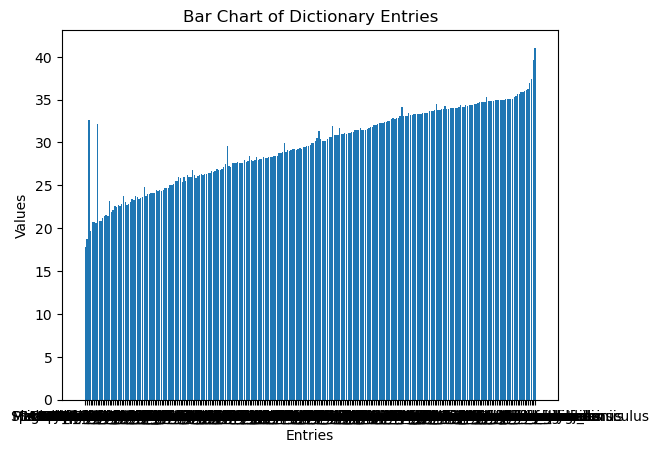

In [2]:
###This code allows for further analysis of the result. Creating a plot with number of CpGs corrected for number of missing genes

#load packages
import matplotlib.pyplot as plt

#sort the dictionary on values, this is to make the graph clearer
species_dic = dict(sorted(species_dic.items(), key=lambda item: item[1]))
#Extract keys and values from the dictionary
keys = list(species_dic.keys())
values = list()
missed_seq['Homo_sapiens']=0
#This loop created corrected data on the number of CpGs for each species
for spec in species_dic.keys():
    my_val = species_dic[spec]/(13491-missed_seq[spec])
    values.append(my_val)

#This plot is not essentail, but does highlight if there are species that have an under representation of CpG dyads as a result of missing genes
#Plotting the bar chart
plt.bar(keys, values)

#Adding labels and title
plt.xlabel('Entries')
plt.ylabel('Values')
plt.title('Bar Chart of Dictionary Entries')

# Display the plot
plt.show()
#An example file if opened to give a list of species.
with open('test_data/gene_1.fasta','r') as f:
    lines = f.read()
    lines=lines.split('\n')
    #A file is written with the species and the number of CpG codon dyads it has
    with open('species_list_with_data.txt','w') as res:
        res.write('Species')
        res.write('\t')
        res.write('num')
        res.write('\n')
        for line in lines:
            if len(line)==0:
                continue
            if line[0] == '>':
                res.write("'"+line[1:].replace('_',' ')+"'")
                res.write('\t')
                res.write(str(species_dic[line[1:]]))
                res.write('\n')
